In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import math
import matplotlib.pyplot as plt
from random import randint
import scipy.stats as ss
#from scipy.stats import norm, kurtosis, skew
import itertools as itt
sns.set(rc={'figure.figsize':(11.7,8.27)})
import plots
import importlib
from pandas_datareader import data, wb
import datetime
#importlib.reload(plots)

# Introduction to the Chi-square Test
## Example 
You work in the Office of Institutional Research at a regional 4-year university. Over the past 5 years, the number of undergraduate students at each level has changed

### Questions:
- Even though some headcount random variation is inevitable, is the variation beyond what we would expect due to chance alone?
- What types of graphs can we use to better visualize our data?
- How can a chi-square test help us rule out variation due to chance alone?

In [45]:
stud_df = pd.DataFrame({'2007': [560, 369, 209, 267, 64], '2008': [495, 385, 226, 277, 70], '2009': [553, 358, 248, 304, 93], '2010': [547, 361, 268, 328, 77], '2011': [512, 393, 285, 340, 126], '.Class': ['Freshman','Sophmore','Junior','Senior', 'Unclassified']})
stud_df

,.Class,2007,2008,2009,2010,2011
0,Freshman,560,495,553,547,512
1,Sophmore,369,385,358,361,393
2,Junior,209,226,248,268,285
3,Senior,267,277,304,328,340
4,Unclassified,64,70,93,77,126


<Figure size 3240x720 with 0 Axes>

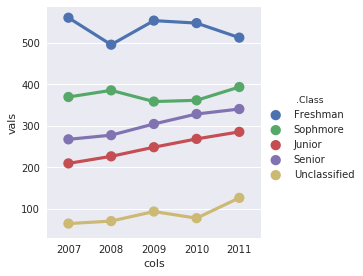

In [46]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
df = stud_df.melt('.Class', var_name='cols',  value_name='vals')
plt.figure(figsize=(45,10))
g = sns.factorplot(x="cols", y="vals", hue='.Class', data=df)

In [47]:
df2[['abuse','nff']].plot(kind='bar', stacked=True)

NameError: name 'df2' is not defined

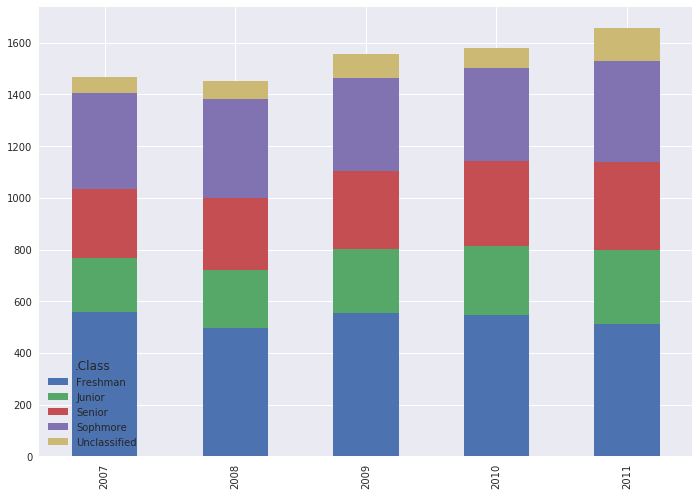

In [66]:
#stud_df['Total'] = stud_df['2007'] + stud_df['2008'] + stud_df['2009'] +stud_df['2010'] + stud_df['2011']
stud_df2  = stud_df.groupby(['.Class']).sum()
#stud_df.loc[5] = stud_df.sum(axis = 0)
#stud_df.loc[5,'.Class'] = 'Total'
#stud_df
stud_df1 = stud_df2.transpose()
stud_df1.plot(kind='bar', stacked=True)


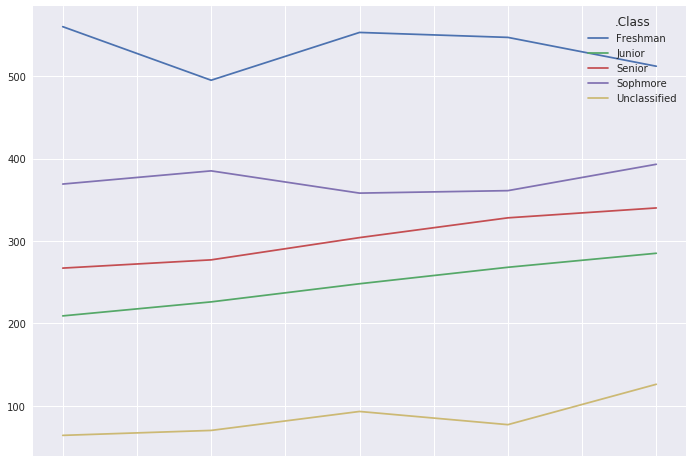

In [67]:
stud_df1.plot()

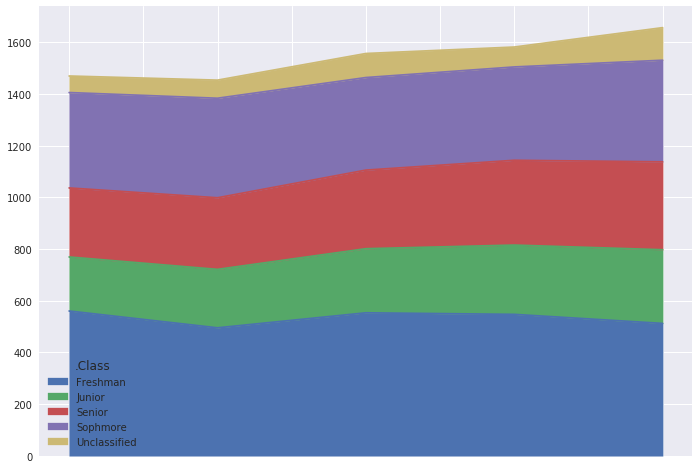

In [68]:
stud_df1.plot.area()

In [72]:
from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)
display_side_by_side(stud_df,stud_df1)

.Class 
 2007 
 2008 
 2009 
 2010 
 2011 
 
 
 
 
 0 
 Freshman 
 560 
 495 
 553 
 547 
 512 
 
 
 1 
 Sophmore 
 369 
 385 
 358 
 361 
 393 
 
 
 2 
 Junior 
 209 
 226 
 248 
 268 
 285 
 
 
 3 
 Senior 
 267 
 277 
 304 
 328 
 340 
 
 
 4 
 Unclassified 
 64 
 70 
 93 
 77 
 126 
 
 
 
 
 
 .Class 
 Freshman 
 Junior 
 Senior 
 Sophmore 
 Unclassified 
 
 
 
 
 2007 
 560 
 209 
 267 
 369 
 64 
 
 
 2008 
 495 
 226 
 277 
 385 
 70 
 
 
 2009 
 553 
 248 
 304 
 358 
 93 
 
 
 2010 
 547 
 268 
 328 
 361 
 77 
 
 
 2011 
 512 
 285 
 340 
 393 
 126

# What is a Chi-Square Test?
- Helps understand the relationship between two categorical variables; grade level, sex, age group, year
- Chi-squares involve the frequency of events; the count
- Helps compare what we actually observed with what we expected oftentimes using population data or theoritcal data
- Chi-squares assist in determinining the role of random chance variation between our categorical variables
- We use the Chi-square distribution and critical value to accept or reject our hypothesis

## Dice Experiment
Let's say I have two die in my hand; one is "fair" and the other is "1-5-6 loaded" (favors 1,5,6). I hand you one die and ask you to determine if it is the fair die or the loaded die. I need you to be 95% in your conclusion.

Over the next 6 days I want you to roll the die 100 times for a total of 600 rolls and then record how many times each number occurs

Let's assume the die is fair, what would expect to happen?

In [85]:
die_df = pd.DataFrame({'.Number': [1,2,3,4,5,6], 'Expected Frequency': [100,100,100,100,100,100]})
#die_df.loc[6] = ['Total', die_df['Expected Frequency'].sum()]
#die_df
die_df.set_index('.Number')

,Expected Frequency
.Number,
1,100
2,100
3,100
4,100
5,100
6,100


## Stated Hypothesis
Null Hypothesis, $H_O$ - $H_O$: the die is fair
    
Alternative Hypothesis, $H_1$ - $H_1$: the die is NOT fair

Confidence Interval: 95%

Error Probability: P-value $\leq$ .05

Degrees of Freedom (df): (6-1)=5

In [99]:
p_value = .05
df = 6-1
ss.chi2.isf(p_value, df)

11.070497693516353

Therefore is $\chi^2 > 11.07$, then we must reject $H_O$ and claim the die is NOT FAIR

In [100]:
die_df = pd.DataFrame({'.Number': [1,2,3,4,5,6], 'Expected': [100,100,100,100,100,100], 'Observed': [111,90,81,102,124,92]})
#die_df.loc[6] = ['Total', die_df['Expected Frequency'].sum()]
#die_df
die_df = die_df.set_index('.Number')
#die_df.loc['Total'] = die_df.sum()
die_df

,Expected,Observed
.Number,,
1,100,111
2,100,90
3,100,81
4,100,102
5,100,124
6,100,92


In [101]:
die_df['O-E'] = die_df['Observed'] - die_df['Expected']
die_df

,Expected,Observed,O-E
.Number,,,
1,100,111,11
2,100,90,-10
3,100,81,-19
4,100,102,2
5,100,124,24
6,100,92,-8


In [102]:
die_df['(O-E)^2'] = die_df['O-E']**2
die_df

,Expected,Observed,O-E,(O-E)^2
.Number,,,,
1,100,111,11,121
2,100,90,-10,100
3,100,81,-19,361
4,100,102,2,4
5,100,124,24,576
6,100,92,-8,64


In [103]:
die_df['(O-E)^2/E'] = die_df['(O-E)^2'] / die_df['Expected']
die_df

,Expected,Observed,O-E,(O-E)^2,(O-E)^2/E
.Number,,,,,
1,100,111,11,121,1.21
2,100,90,-10,100,1.00
3,100,81,-19,361,3.61
4,100,102,2,4,0.04
5,100,124,24,576,5.76
6,100,92,-8,64,0.64


In [105]:
die_df.loc['Total'] = [600,600,'-',r'$\chi^2$', 12.26]
die_df

,Expected,Observed,O-E,(O-E)^2,(O-E)^2/E
.Number,,,,,
1,100,111,11,121,1.21
2,100,90,-10,100,1.00
3,100,81,-19,361,3.61
4,100,102,2,4,0.04
5,100,124,24,576,5.76
6,100,92,-8,64,0.64
Total,600,600,-,$\chi^2$,12.26


Therefore since 12.26 > 11.07, we REJECT $H_O$

# Chi-Square Test of Independence
The Chi-square can be thought of as a test of independence
- Are these two variable "statistically" independent or related?
- It Offers us nothing more than: relationship or no relationship

Hypothesis:
- Null $H_O$: The two categorical variables are independent
- Alternative $H_1$: The two categorical variables are related

Observed frequency vs. Expected frequency
- Is this variation between the observed and expected frequencies minor enough to be within what we may expect due to chance alone?

Contingency Tables
- One variable along the top; the other down the left side
- Two Tables: Observations Contingency Table and an Expected Contingency Table 
    
Degrees of Freedom
- (#columns - 1) * (#rows - 1) = degrees of freedom